In [1]:
import  numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\shivang\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
X,y = make_blobs(centers = 2, random_state = 0)

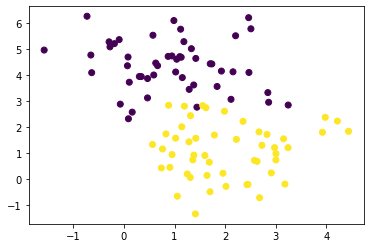

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [21]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.01, iters=20):
        self._lr = lr
        self._iters = iters
        
    def fit(self, X,y):
        self._y = y.reshape(-1,1)
        X_mod = np.hstack([np.ones([len(X),1]),X])
        self._X = X_mod

        self._theta = np.zeros([X_mod.shape[1],1])
        
        err = []
        for i in range(self._iters):
            err.append(self.error())
            self.gradient_ascend()
        
        self.theta_ = self._theta
        return err
    
    def gradient_ascend(self):
        delta_theta = self.gradient()
        self._theta -= delta_theta
    
    def gradient(self):
        yh = self.hypothesis(self._X) # (100,1)
        ya = self._y 
        diff = -(ya-yh) # (100,1)
        return np.dot(self._X.T, diff) * self._lr #(3,1)
    
    def hypothesis(self,X):
        prod = np.dot(X,self._theta)
        # X.shape = (100,3)
        # shape of theta = (3,1)
        # shape of product = (100,1)
        
        return 1 / (1 + np.exp(-prod))
    
    def error(self):
        yh = self.hypothesis(self._X)
        ya = self._y
        ll = ya* np.log(yh) + (1-ya)*np.log(1-yh)
        # shape of ll = (100,1)
        
        return -np.mean(ll)
    
    def predict(self,X):
        X_mod = np.hstack([np.ones([len(X),1]),X])
        yh = self.hypothesis(X_mod)
        return (yh>0.5).astype(int).flatten()
    
    def score(self,X,y):
        yp = self.predict(X)
        return np.mean(yp==y)
    
    def confusion_matrix(self, X,y):
        yp = self.predict(X)
        
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==1) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==0) & (yp==0))
        
        return np.array([[tp,fp],[fn,tn]])
        

In [22]:
model = CustomLogisticRegression()


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [24]:
err = model.fit(X_train,y_train)

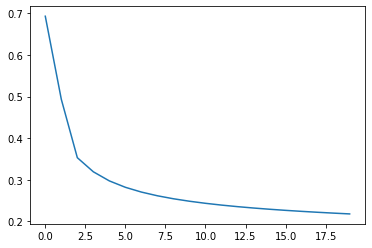

In [25]:
plt.plot(err)

In [26]:
model.theta_

array([[ 0.71194608],
       [ 1.17525229],
       [-1.1967875 ]])

In [27]:
model.score(X_test,y_test)

0.8787878787878788

In [28]:
c_m = model.confusion_matrix(X_test,y_test)

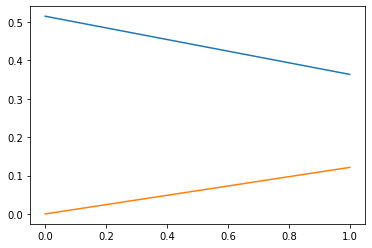

In [29]:
plt.plot(c_m)

In [30]:
import seaborn as sns

<AxesSubplot:>

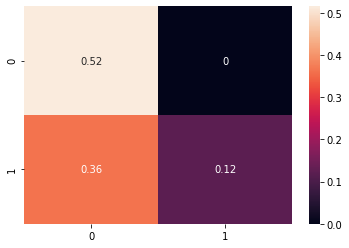

In [32]:
sns.heatmap(c_m,annot = True)